In [2]:
import argparse
import hashlib
import pandas as pd

df = pd.read_csv("C:/Temporal/fortune_500.csv")

title_nan = df['title'].isna()


missing_title = (df['website'].str.extract(r'(?P<missing_title>[^/]+)$')
                 .applymap(lambda title: title.split('.'))
                 .applymap(lambda title_new: list(map(lambda title_n: title_n.replace('www', ''), title_new)))
                 .applymap(lambda title_new: list(map(lambda title_n: title_n.replace('com', ''), title_new)))
                 .applymap(lambda title_new: ' '.join(title_new))
                )

df.loc[title_nan, 'title'] = missing_title.loc[:, 'missing_title']

uids = (df
        .apply(lambda row: hashlib.md5(bytes(row['website'].encode())), axis=1)
        .apply(lambda row: row.hexdigest())
            )
df['uid'] = uids
df.set_index('uid')

#df.iloc[10:15]
#df.loc[10:, 'title']
##df.drop(df.columns[[2]], axis=1)
df['hqcity'].value_counts()
    

New York        45
Houston         18
Atlanta         12
Dallas          10
Chicago         10
                ..
Northbrook       1
Newport News     1
Fairfield        1
Taylor           1
Norfolk          1
Name: hqcity, Length: 239, dtype: int64

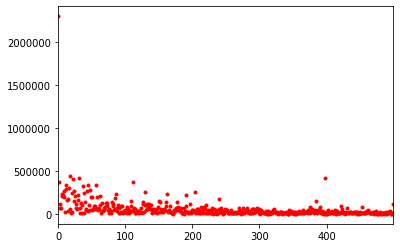

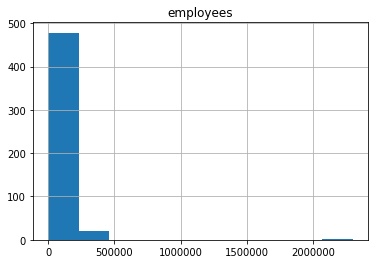

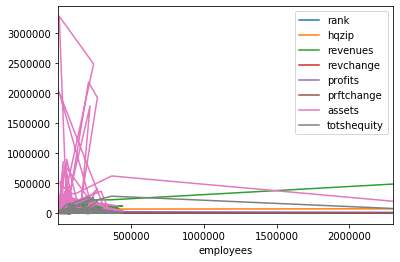

In [13]:
df.describe()
%matplotlib inline

df['employees'].plot(style='r.')
df.hist('employees')
df.plot('employees')



